In [127]:
## import necessary libraries
import numpy as np
import pandas as pd

In [128]:
## read the raw data file
df = pd.read_csv('raw_data/diabetes_012_health_indicators_BRFSS2015.csv')
print('The dataframe has {} rows and {} columns'.format(df.shape[0],df.shape[1]))
print(df.columns.values)
df.head()

The dataframe has 253680 rows and 22 columns
['Diabetes_012' 'HighBP' 'HighChol' 'CholCheck' 'BMI' 'Smoker' 'Stroke'
 'HeartDiseaseorAttack' 'PhysActivity' 'Fruits' 'Veggies'
 'HvyAlcoholConsump' 'AnyHealthcare' 'NoDocbcCost' 'GenHlth' 'MentHlth'
 'PhysHlth' 'DiffWalk' 'Sex' 'Age' 'Education' 'Income']


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [129]:
## check out the variable type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [130]:
## check missingness of each columns
df.isnull().sum() ## no missingness is detected

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

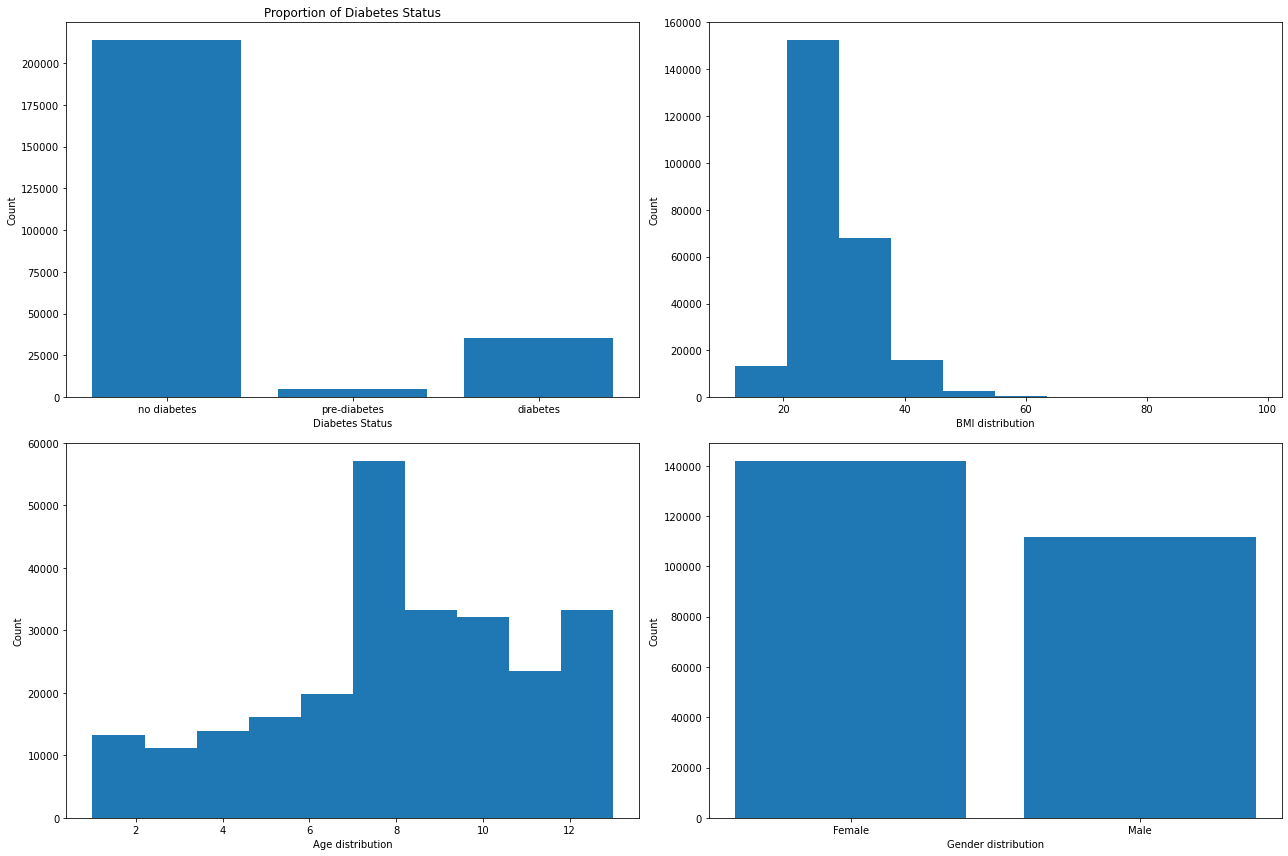

In [131]:
## check the proportion of the outcome variable
import matplotlib.pyplot as plt

df['Diabetes_012'] = df['Diabetes_012'].astype(int)
value_counts = df['Diabetes_012'].value_counts().sort_index()

# Create a dictionary to map values to labels
value_labels = {0: "no diabetes", 1: "pre-diabetes", 2: "diabetes"}

# Use list comprehension to get the labels for the x-axis
x_labels = [value_labels[val] for val in value_counts.index]

plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.bar(x_labels, value_counts.values)
plt.xlabel("Diabetes Status")
plt.ylabel("Count")
plt.title("Proportion of Diabetes Status")


plt.subplot(2,2,2)
plt.hist(df['BMI'])
plt.xlabel("BMI distribution")
plt.ylabel("Count")

plt.subplot(2,2,3)
plt.hist(df['Age'])
plt.xlabel("Age distribution")
plt.ylabel("Count")

plt.subplot(2,2,4)
plt.bar(['Female', 'Male'], df['Sex'].value_counts().values)
plt.xlabel("Gender distribution")
plt.ylabel("Count")

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

## there is a clear class imbalance in this; few patients are pre-diabetes

In [135]:
## Unsupervised clustering
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.iloc[:,1:]
X = StandardScaler().fit_transform(X) # normalizing the features
y = df.iloc[:,0]
pca = PCA(n_components=2)
principleComponent = pca.fit_transform(X)
principleComponent = pd.DataFrame(principleComponent, columns = ["PC1", "PC2"])
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)
principleComponent

explained variance ratio (first two components): [0.16713006 0.083967  ]


,PC1,PC2
0,4.775686,0.431357
1,0.572907,5.461355
2,4.941336,1.797476
3,-0.346491,-0.671374
4,-0.162744,-1.328134
...,...,...
253675,0.322012,-0.784460
253676,3.188503,-0.148198
253677,-1.305527,1.716965
253678,0.463938,0.127620


<Figure size 432x288 with 0 Axes>

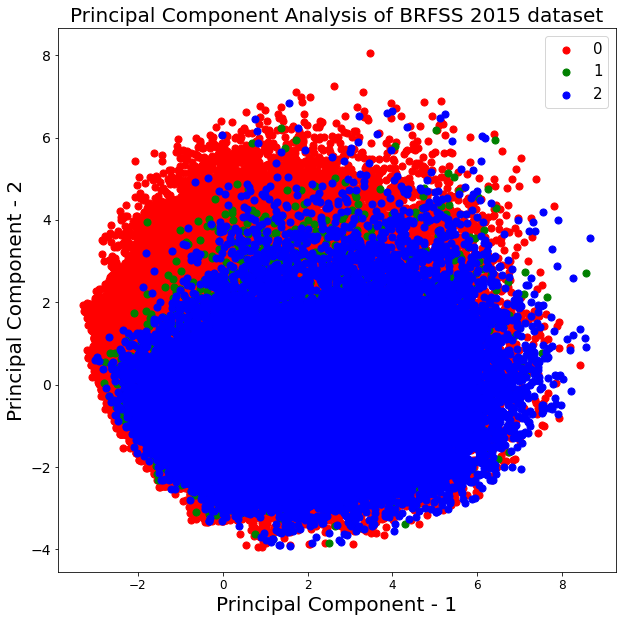

In [136]:
# visualize the princinple components
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of BRFSS 2015 dataset",fontsize=20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df['Diabetes_012'] == target
    plt.scatter(principleComponent.loc[indicesToKeep, 'PC1']
               , principleComponent.loc[indicesToKeep, 'PC2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.show()

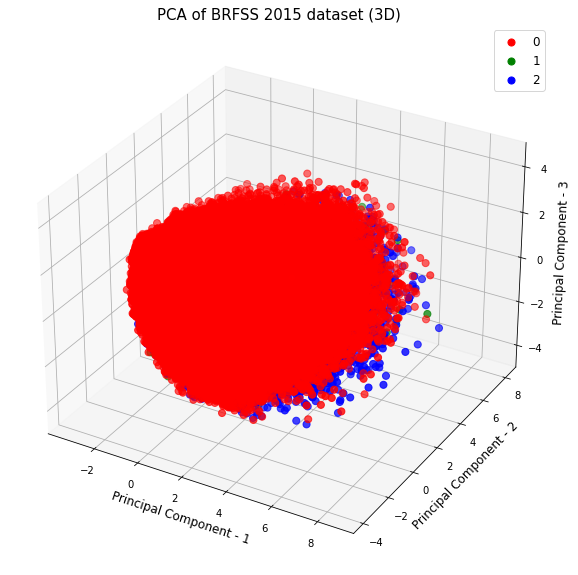

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

X = df.iloc[:, 1:]
X = StandardScaler().fit_transform(X)
y = df.iloc[:, 0]

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalComponents = pd.DataFrame(principalComponents, columns=["PC1", "PC2", "PC3"])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Principal Component - 1', fontsize=12)
ax.set_ylabel('Principal Component - 2', fontsize=12)
ax.set_zlabel('Principal Component - 3', fontsize=12)
ax.set_title("PCA of BRFSS 2015 dataset (3D)", fontsize=15)

targets = [0, 1, 2]
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = df['Diabetes_012'] == target
    ax.scatter(principalComponents.loc[indicesToKeep, 'PC1'],
               principalComponents.loc[indicesToKeep, 'PC2'],
               principalComponents.loc[indicesToKeep, 'PC3'],
               c=color, s=50)

ax.legend(targets, prop={'size': 12})

plt.show()